<a href="https://colab.research.google.com/github/Skommireddy/Projects-IDS/blob/main/HW4/problem1_r_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Goal: *Identifying the data source, collecting the data from GitHub, analyzing the data set in R by creating contingency tables, plotting the graphs, determining the outliers and Standardize (zero mean) the variables.*


The %load_ext magic command loads the rpy2 IPython extension into the notebook, essentially initializing the R interface and allowing the notebook to connect and pass objects between the two languages.

In [72]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Importing csv file from Github repositiory HW4 folder.
Printing the imported data set adult_trainingDF.

In [73]:
# Let's read in the data file
%%R
# used to read csv files
library(readr)
# importing the data file from Github Repo.
adult_trainingDF <- read_csv("https://raw.githubusercontent.com/Skommireddy/Projects-IDS/main/HW4/adult_training.csv", show_col_types = FALSE)
# printing the data frame
adult_trainingDF

# A tibble: 14,797 × 9
     age workclass      education marital_status occupation sex   `capital-gain`
   <dbl> <chr>              <dbl> <chr>          <chr>      <chr>          <dbl>
 1    50 Self-emp-not-…        13 Married-civ-s… Exec-mana… Male               0
 2    38 Private                9 Divorced       Handlers-… Male               0
 3    49 Private                5 Married-spous… Other-ser… Fema…              0
 4    52 Self-emp-not-…         9 Married-civ-s… Exec-mana… Male               0
 5    31 Private               14 Never-married  Prof-spec… Fema…          14084
 6    40 Private               11 Married-civ-s… Craft-rep… Male               0
 7    38 Private                7 Married-civ-s… Sales      Male               0
 8    43 Private                7 Married-civ-s… Transport… Male               0
 9    54 ?                     10 Married-civ-s… ?          Male               0
10    39 Private                9 Divorced       Exec-mana… Male               0
# … w

In [74]:
# Summarizing the data frame. 
%%R
summary(adult_trainingDF)

      age         workclass           education     marital_status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

Contingency table of workclass and sex to understand the correlation between work class and sex variables..

In [75]:
# crosstab for the workclass and sex variables:
%%R
p.crosstab <- table(adult_trainingDF$workclass, adult_trainingDF$sex)
ftable(p.crosstab)

                  Female Male
                             
?                    377  452
Federal-gov          149  305
Local-gov            377  592
Never-worked           1    4
Private             3574 6707
Self-emp-inc          54  444
Self-emp-not-inc     178  992
State-gov            201  385
Without-pay            1    4


Ploting the Contingency table of workclass and sex using barplot.

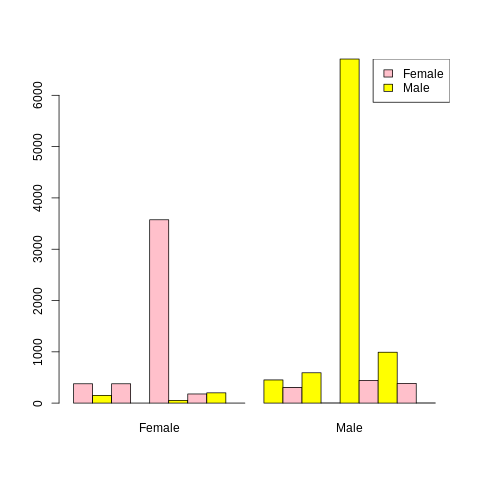

In [76]:
# Creating barplot
# x label rotation
%%R
colors <- c("pink", "yellow")
barplot(p.crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

Contingency table of sex and marital status to understand the correlation between sex and marital_status variables.

In [77]:
# Create a crosstab for the sex and marital_status variables:
%%R
a.crosstab <- table(adult_trainingDF$sex, adult_trainingDF$marital_status)
ftable(a.crosstab)

        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female      1219                 7                761                    95          2160       290     380
Male         795                 4               6010                   104          2717       182      73


Plotting the contingency table of sex and marital status using barplot.

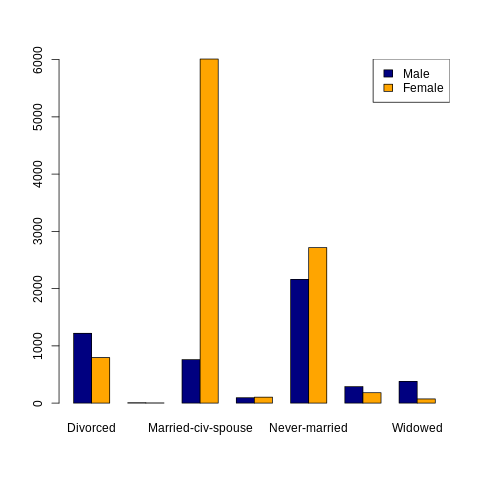

In [78]:
# Creating barplot
# x label rotation
%%R
colors <- c("navy", "orange")
barplot(a.crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("Male", "Female"), fill = colors)

Create a new data frame, adultOver40, for those whose age > 40

In [79]:
# a new data frame, adultOver40, for those whose age > 40.
%%R
adultOver40DF = subset(adult_trainingDF, subset = age > 40)
# printing new data frame
adultOver40DF

# A tibble: 6,144 × 9
     age workclass      education marital_status occupation sex   `capital-gain`
   <dbl> <chr>              <dbl> <chr>          <chr>      <chr>          <dbl>
 1    50 Self-emp-not-…        13 Married-civ-s… Exec-mana… Male               0
 2    49 Private                5 Married-spous… Other-ser… Fema…              0
 3    52 Self-emp-not-…         9 Married-civ-s… Exec-mana… Male               0
 4    43 Private                7 Married-civ-s… Transport… Male               0
 5    54 ?                     10 Married-civ-s… ?          Male               0
 6    44 Private               14 Divorced       Exec-mana… Fema…              0
 7    50 Federal-gov           13 Divorced       Exec-mana… Male               0
 8    47 Self-emp-inc           9 Divorced       Exec-mana… Male               0
 9    43 Private               10 Married-civ-s… Tech-supp… Male               0
10    53 Private                9 Married-civ-s… Adm-cleri… Fema…              0
# … wi

Contingency table of sex and marital status for adultOver40.

In [80]:
# Cross tabulation of sex and marital_status for adultOver40
%%R
p.crosstab <- table(adultOver40DF$sex, adultOver40DF$marital_status)
ftable(p.crosstab)

        Divorced Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                         
Female       720                305                    38           256       133     354
Male         448               3383                    47           315        74      71


Determine whether any outliers exist for the education field.
*   Outliers exist for education field. There are 269 outliers.
*   From the box plot and three sigma rule first below all the values below 4 are outliers.


In [81]:
# Recall that we scaled $education before
%%R
summary(adult_trainingDF$education)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.07   12.00   16.00 


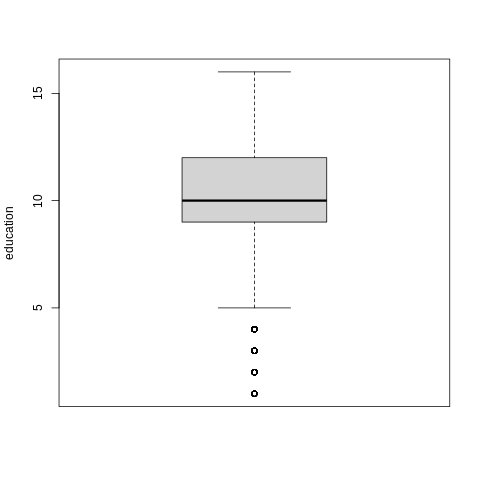

In [82]:
%%R
boxplot(adult_trainingDF$education,
  ylab = "education"
)

Using Three sigma Rule to determine the outliers for education field.

In [83]:
# Determine the three sigma rule first for the education attribute
%%R
three_sigma_rule <- (adult_trainingDF$education < -3 | 
                     adult_trainingDF$education > 3 )
# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")
# The condition given as input to which() states that we want
# all records whose scaled education values are less than −3 or greater than 3. 
# The which() command returns the row indices of all such records. 
cat("The scaled education values that are outliers: \n\n")
adult_trainingDF$education[which(three_sigma_rule)]
cat("\n\nThe scaled education values that are NOT outliers: \n\n")
adult_trainingDF$education[which(!three_sigma_rule)]

There are 14528 outliers 

The scaled education values that are outliers: 



The scaled education values that are NOT outliers: 

  [1] 2 1 2 3 2 3 3 2 2 3 3 2 3 3 2 3 3 2 3 2 3 1 1 3 3 2 3 3 1 3 3 2 1 2 3 3 3
 [38] 3 3 2 3 3 3 3 2 2 2 2 3 1 1 2 2 1 1 1 3 2 2 1 3 2 3 3 2 3 3 3 3 3 3 3 3 2
 [75] 3 3 3 3 3 3 3 3 3 1 2 3 3 3 1 2 3 3 2 3 3 2 3 2 2 3 2 3 3 3 2 2 2 3 3 3 3
[112] 2 2 3 3 2 3 2 3 2 2 3 3 3 3 2 2 2 2 3 2 1 3 2 3 3 2 3 3 3 3 3 3 2 3 3 3 3
[149] 2 2 3 2 2 2 2 3 3 2 3 3 3 3 3 2 3 3 3 1 3 2 1 3 1 3 3 3 1 3 3 2 3 3 3 3 3
[186] 3 3 3 3 3 1 2 1 1 3 1 3 3 3 2 3 1 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3
[223] 2 2 2 2 3 3 3 2 3 2 3 3 3 3 2 3 2 2 2 3 2 2 2 2 3 3 3 3 3 3 2 2 2 3 2 2 2
[260] 3 2 2 3 2 1 3 3 2 3


Standardize (zero mean) the age variable, and identify how many outliers 
there are. What is the most extreme outlier?
*   There are 60 outliers in age variable.
*   From the box plot below age 90 is the most extreme outlier.


In [84]:
#Standardize (zero mean) the age variable
%%R
adult_trainingDF$scaled_age <- scale(x = adult_trainingDF$age)
summary(adult_trainingDF$scaled_age)


       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  


In [85]:
# three sigma rule for age variable.
%%R
three_sigma_rule <- (adult_trainingDF$scaled_age < -3 | 
                     adult_trainingDF$scaled_age > 3 )
# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")
# The condition given as input to which() states that we want
# all records whose scaled age values are less than −3 or greater than 3. 
# The which() command returns the row indices of all such records. 
cat("The scaled age values that are outliers: \n\n")
adult_trainingDF$scaled_age[which(three_sigma_rule)]
cat("\n\nThe scaled age values that are NOT outliers: \n\n")
adult_trainingDF$scaled_age[which(!three_sigma_rule)]

There are 60 outliers 

The scaled age values that are outliers: 



The scaled age values that are NOT outliers: 

    [1]  0.82700980 -0.05025535  0.75390437  0.97322066 -0.56199336  0.09595551
    [7] -0.05025535  0.31527180  1.11943152  0.02285008 -0.63509878 -1.29304765
   [13] -1.43925851 -0.56199336 -0.56199336 -1.07373136  0.38837722 -1.00062593
   [19] -1.51236393  0.82700980  0.60769351  0.31527180 -0.26957164 -0.63509878
   [25] -0.70820421 -0.78130964  1.04632609 -1.00062593 -0.56199336 -1.14683679
   [31]  2.94706725  0.09595551 -1.51236393  0.97322066  1.48495866  0.38837722
   [37]  0.75390437  0.31527180 -0.48888793  2.72775096  0.38837722  0.60769351
   [43] -1.58546936 -0.63509878 -0.56199336  0.24216637 -0.19646621  1.04632609
   [49]  1.26564237  0.75390437 -1.21994222  0.09595551 -0.63509878 -0.70820421
   [55] -1.43925851 -1.36615308 -0.56199336 -0.78130964 -1.07373136 -0.12336078
   [61] -0.05025535 -0.85441507  0.75390437  1.63116952 -0.85441507 -1.43925851
   [

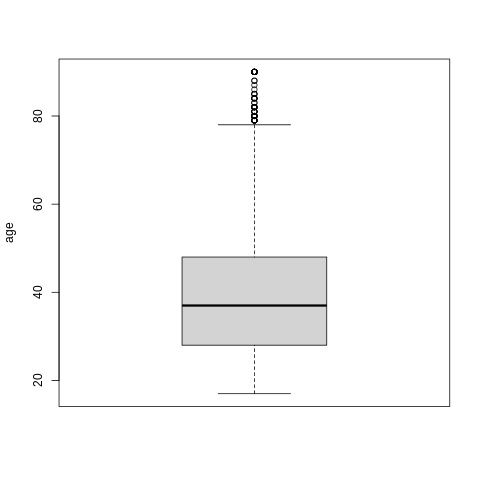

In [86]:
#barplot of age variable
%%R
boxplot(adult_trainingDF$age,
  ylab = "age"
)

Age anomaly? Select only records with age  at least 80. Explain what you see.
* From the histogram below 80 to 82 and 88 to 90 has the highest number of adults from age atleast 80.

In [87]:
# a new data frame, ageatleast80, for those whose age >= 80.
%%R
ageatleast80DF = subset(adult_trainingDF, subset = age >= 80)
ageatleast80DF

# A tibble: 60 × 10
     age workclass      education marital_status occupation sex   `capital-gain`
   <dbl> <chr>              <dbl> <chr>          <chr>      <chr>          <dbl>
 1    90 Private                9 Never-married  Other-ser… Male               0
 2    80 ?                      9 Widowed        ?          Male               0
 3    90 Private                9 Never-married  Other-ser… Fema…              0
 4    88 Self-emp-not-…        15 Married-civ-s… Prof-spec… Male               0
 5    90 Private               13 Married-civ-s… Exec-mana… Male               0
 6    90 Private               10 Never-married  Other-ser… Male               0
 7    82 ?                      4 Widowed        ?          Male               0
 8    90 Private                5 Never-married  Adm-cleri… Fema…              0
 9    80 Private               14 Widowed        Prof-spec… Fema…              0
10    90 Local-gov             14 Married-civ-s… Exec-mana… Male           20051
# … with

Construct a histogram of age.

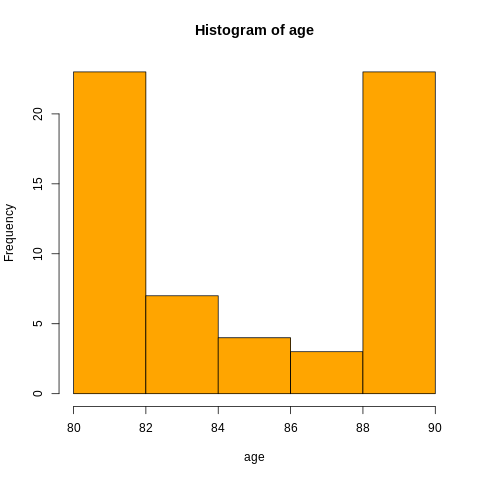

In [88]:
#generating the histogram for age. 
%%R
hist(ageatleast80DF$age, xlab = "age", 
       main = "Histogram of age", col="orange")